![](grid.png)

# ELC-144x142x79
---

Test with initial condition (on Jean-Zay):
> /gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79/ATM/Output

that I created with 

> EXPERIMENTS/LMDZ/CREATE_clim_360d/config.card

Ce fichier va chercher le fichier Relief.nc suivant : `/gpfswork/rech/psl/commun/IGCM/ATM/Relief.nc`

that I copie on CICLAD: 

> /data/mlalande/ELC-144x142x79_clim


amip_CMIP6 -> /gpfswork/rech/psl/commun/IGCM//ATM/START/eORCA1.2xLMD144x142/startphy_eORCA1.2xLMD144x142x79_o2a_v3.nc

- [#Open-ELC-144x142x79_clim-files](#Open-ELC-144x142x79_clim-files)  
- [#Physics-grid-to-dynamics-grid](#Physics-grid-to-dynamics-grid)  
- [#Check-"by-hand"](#Check-"by-hand")
- [#Make-function](#Make-function)


### Import modules

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 107 GB / percent used: 14.7 %


# Open ELC-144x142x79_clim files

In [2]:
path = '/data/mlalande/ELC-144x142x79_clim/Output'

limit = xr.open_dataset(path+'/Boundary/ELC-144x142x79_clim_limit.nc')
grilles_gcm = xr.open_dataset(path+'/Grid/ELC-144x142x79_grilles_gcm.nc')
start = xr.open_dataset(path+'/Restart/ELC-144x142x79_clim_start.nc')
startphy = xr.open_dataset(path+'/Restart/ELC-144x142x79_clim_startphy.nc')

In [3]:
limit

<xarray.Dataset>
Dimensions:    (points_physiques: 20306, time: 360)
Dimensions without coordinates: points_physiques, time
Data variables:
    TEMPS      (time) float64 ...
    FOCE       (time, points_physiques) float64 ...
    FSIC       (time, points_physiques) float64 ...
    FTER       (time, points_physiques) float64 ...
    FLIC       (time, points_physiques) float64 ...
    SST        (time, points_physiques) float64 ...
    BILS       (time, points_physiques) float64 ...
    ALB        (time, points_physiques) float64 ...
    RUG        (time, points_physiques) float64 ...
    longitude  (points_physiques) float32 ...
    latitude   (points_physiques) float32 ...
Attributes:
    title:    Fichier conditions aux limites
    history:  File produced using ce0l executable.\nSea Ice Concentration bui...

In [4]:
grilles_gcm

<xarray.Dataset>
Dimensions:   (latu: 143, latv: 142, lev: 79, lonu: 145, lonv: 145)
Coordinates:
  * lonu      (lonu) float32 181.25 183.75 186.25 ... 536.25 538.75 541.25
  * lonv      (lonv) float32 180.0 182.5 185.0 187.5 ... 532.5 535.0 537.5 540.0
  * latu      (latu) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * latv      (latv) float32 89.366196 88.098595 ... -88.098595 -89.366196
Dimensions without coordinates: lev
Data variables:
    grille_u  (latu, lonu) float32 ...
    grille_v  (latv, lonv) float32 ...
    grille_s  (latu, lonv) float32 ...
    presnivs  (lev) float32 ...
    phis      (latu, lonv) float32 ...
    aire      (latu, lonv) float32 ...
    mask      (latu, lonv) int32 ...

In [5]:
start

<xarray.Dataset>
Dimensions:   (index: 100, rlatu: 143, rlatv: 142, rlonu: 145, rlonv: 145, sig: 80, sigs: 79, temps: 1)
Coordinates:
  * rlonu     (rlonu) float64 -3.12 -3.076 -3.033 -2.989 ... 3.076 3.12 3.163
  * rlatu     (rlatu) float64 1.571 1.549 1.527 1.504 ... -1.527 -1.549 -1.571
  * rlonv     (rlonv) float64 -3.142 -3.098 -3.054 -3.011 ... 3.054 3.098 3.142
  * rlatv     (rlatv) float64 1.56 1.538 1.515 1.493 ... -1.515 -1.538 -1.56
  * temps     (temps) datetime64[ns] 1979-01-01
Dimensions without coordinates: index, sig, sigs
Data variables:
    controle  (index) float64 ...
    nivsigs   (sigs) float64 ...
    nivsig    (sig) float64 ...
    ap        (sig) float64 ...
    bp        (sig) float64 ...
    presnivs  (sigs) float64 ...
    cu        (rlatu, rlonu) float64 ...
    cv        (rlatv, rlonv) float64 ...
    aire      (rlatu, rlonv) float64 ...
    phisinit  (rlatu, rlonv) float64 ...
    ucov      (temps, sigs, rlatu, rlonu) float64 ...
    vcov      (temps, sigs, rlatv, rlonv) float64 ...
    teta      (temps, sigs, rlatu, rlonv) float64 ...
    H2Ov      (temps, sigs, rlatu, rlonv) float64 ...
    H2Ol      (temps, sigs, rlatu, rlonv) float64 ...
    H2Oi      (temps, sigs, rlatu, rlonv) float64 ...
    Aga       (temps, sigs, rlatu, rlonv) float64 ...
    masse     (temps, sigs, rlatu, rlonv) float64 ...
    ps        (temps, rlatu, rlonv) float64 ...
Attributes:
    title:    Fichier demarrage dynamique

In [7]:
startphy

<xarray.Dataset>
Dimensions:          (horizon_klevp1: 1624480, horizon_vertical: 1604174, index: 100, points_physiques: 20306)
Dimensions without coordinates: horizon_klevp1, horizon_vertical, index, points_physiques
Data variables:
    controle         (index) float64 ...
    longitude        (points_physiques) float64 ...
    latitude         (points_physiques) float64 ...
    masque           (points_physiques) float64 ...
    FTER             (points_physiques) float64 ...
    FLIC             (points_physiques) float64 ...
    FOCE             (points_physiques) float64 ...
    FSIC             (points_physiques) float64 ...
    TS01             (points_physiques) float64 ...
    TS02             (points_physiques) float64 ...
    TS03             (points_physiques) float64 ...
    TS04             (points_physiques) float64 ...
    A_dir_SW01srf01  (points_physiques) float64 ...
    A_dir_SW02srf01  (points_physiques) float64 ...
    A_dir_SW03srf01  (points_physiques) float64 ...
    A_dir_SW04srf01  (points_physiques) float64 ...
    A_dir_SW05srf01  (points_physiques) float64 ...
    A_dir_SW06srf01  (points_physiques) float64 ...
    A_dir_SW01srf02  (points_physiques) float64 ...
    A_dir_SW02srf02  (points_physiques) float64 ...
    A_dir_SW03srf02  (points_physiques) float64 ...
    A_dir_SW04srf02  (points_physiques) float64 ...
    A_dir_SW05srf02  (points_physiques) float64 ...
    A_dir_SW06srf02  (points_physiques) float64 ...
    A_dir_SW01srf03  (points_physiques) float64 ...
    A_dir_SW02srf03  (points_physiques) float64 ...
    A_dir_SW03srf03  (points_physiques) float64 ...
    A_dir_SW04srf03  (points_physiques) float64 ...
    A_dir_SW05srf03  (points_physiques) float64 ...
    A_dir_SW06srf03  (points_physiques) float64 ...
    A_dir_SW01srf04  (points_physiques) float64 ...
    A_dir_SW02srf04  (points_physiques) float64 ...
    A_dir_SW03srf04  (points_physiques) float64 ...
    A_dir_SW04srf04  (points_physiques) float64 ...
    A_dir_SW05srf04  (points_physiques) float64 ...
    A_dir_SW06srf04  (points_physiques) float64 ...
    A_dif_SW01srf01  (points_physiques) float64 ...
    A_dif_SW02srf01  (points_physiques) float64 ...
    A_dif_SW03srf01  (points_physiques) float64 ...
    A_dif_SW04srf01  (points_physiques) float64 ...
    A_dif_SW05srf01  (points_physiques) float64 ...
    A_dif_SW06srf01  (points_physiques) float64 ...
    A_dif_SW01srf02  (points_physiques) float64 ...
    A_dif_SW02srf02  (points_physiques) float64 ...
    A_dif_SW03srf02  (points_physiques) float64 ...
    A_dif_SW04srf02  (points_physiques) float64 ...
    A_dif_SW05srf02  (points_physiques) float64 ...
    A_dif_SW06srf02  (points_physiques) float64 ...
    A_dif_SW01srf03  (points_physiques) float64 ...
    A_dif_SW02srf03  (points_physiques) float64 ...
    A_dif_SW03srf03  (points_physiques) float64 ...
    A_dif_SW04srf03  (points_physiques) float64 ...
    A_dif_SW05srf03  (points_physiques) float64 ...
    A_dif_SW06srf03  (points_physiques) float64 ...
    A_dif_SW01srf04  (points_physiques) float64 ...
    A_dif_SW02srf04  (points_physiques) float64 ...
    A_dif_SW03srf04  (points_physiques) float64 ...
    A_dif_SW04srf04  (points_physiques) float64 ...
    A_dif_SW05srf04  (points_physiques) float64 ...
    A_dif_SW06srf04  (points_physiques) float64 ...
    U10M01           (points_physiques) float64 ...
    U10M02           (points_physiques) float64 ...
    U10M03           (points_physiques) float64 ...
    U10M04           (points_physiques) float64 ...
    V10M01           (points_physiques) float64 ...
    V10M02           (points_physiques) float64 ...
    V10M03           (points_physiques) float64 ...
    V10M04           (points_physiques) float64 ...
    Tsoil01srf01     (points_physiques) float64 ...
    Tsoil02srf01     (points_physiques) float64 ...
    Tsoil03srf01     (points_physiques) float64 ...
    Tsoil04srf01     (points_physiques) float64 ...
    Tsoil05srf01     (points_phys

# Physics grid to dynamics grid

In [23]:
# Create the right dimension for topo (without the duplicated longitude)
ZMEA_clim_360d = grilles_gcm.aire[:,:-1].copy()
ZMEA_clim_360d.name = 'ZMEA'
ZMEA_clim_360d.attrs['units'] = 'm'
ZMEA_clim_360d.attrs['long_name'] = 'MEAN OROGRAPHY'
ZMEA_clim_360d

<xarray.DataArray 'ZMEA' (latu: 143, lonv: 144)>
array([[1.0934733e+08, 1.0934733e+08, 1.0934733e+08, ..., 1.0934733e+08,
        1.0934733e+08, 1.0934733e+08],
       [8.7469837e+08, 8.7469837e+08, 8.7469837e+08, ..., 8.7469837e+08,
        8.7469837e+08, 8.7469837e+08],
       [1.7489686e+09, 1.7489686e+09, 1.7489686e+09, ..., 1.7489686e+09,
        1.7489686e+09, 1.7489686e+09],
       ...,
       [1.7489686e+09, 1.7489686e+09, 1.7489686e+09, ..., 1.7489686e+09,
        1.7489686e+09, 1.7489686e+09],
       [8.7469837e+08, 8.7469837e+08, 8.7469837e+08, ..., 8.7469837e+08,
        8.7469837e+08, 8.7469837e+08],
       [1.0934733e+08, 1.0934733e+08, 1.0934733e+08, ..., 1.0934733e+08,
        1.0934733e+08, 1.0934733e+08]], dtype=float32)
Coordinates:
  * lonv     (lonv) float32 180.0 182.5 185.0 187.5 ... 530.0 532.5 535.0 537.5
  * latu     (latu) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
Attributes:
    units:      m
    long_name:  MEAN OROGRAPHY

In [24]:
# Dupplicate the first and last value North and South Pole
ZMEA_clim_360d[0] = startphy.ZMEA[0]
ZMEA_clim_360d[-1] = startphy.ZMEA[-1]

In [25]:
# Without the Poles
ZMEA_clim_360d[1:-1,:]

<xarray.DataArray 'ZMEA' (latu: 141, lonv: 144)>
array([[8.7469837e+08, 8.7469837e+08, 8.7469837e+08, ..., 8.7469837e+08,
        8.7469837e+08, 8.7469837e+08],
       [1.7489686e+09, 1.7489686e+09, 1.7489686e+09, ..., 1.7489686e+09,
        1.7489686e+09, 1.7489686e+09],
       [2.6223828e+09, 2.6223828e+09, 2.6223828e+09, ..., 2.6223828e+09,
        2.6223828e+09, 2.6223828e+09],
       ...,
       [2.6223828e+09, 2.6223828e+09, 2.6223828e+09, ..., 2.6223828e+09,
        2.6223828e+09, 2.6223828e+09],
       [1.7489686e+09, 1.7489686e+09, 1.7489686e+09, ..., 1.7489686e+09,
        1.7489686e+09, 1.7489686e+09],
       [8.7469837e+08, 8.7469837e+08, 8.7469837e+08, ..., 8.7469837e+08,
        8.7469837e+08, 8.7469837e+08]], dtype=float32)
Coordinates:
  * lonv     (lonv) float32 180.0 182.5 185.0 187.5 ... 530.0 532.5 535.0 537.5
  * latu     (latu) float32 88.73239 87.46479 86.19718 ... -87.46479 -88.73239
Attributes:
    units:      m
    long_name:  MEAN OROGRAPHY

In [26]:
# Fill all the values except the poles
k=0
for lat in range(ZMEA_clim_360d[1:-1,:].latu.size):
    for lon in range(ZMEA_clim_360d[1:-1,:].lonv.size):
        ZMEA_clim_360d[1:-1,:][lat,lon] = startphy.ZMEA[k+1]
        k += 1

In [27]:
k

20304

In [28]:
startphy.points_physiques.size

20306

Parfait il manque just les 2 points des poles

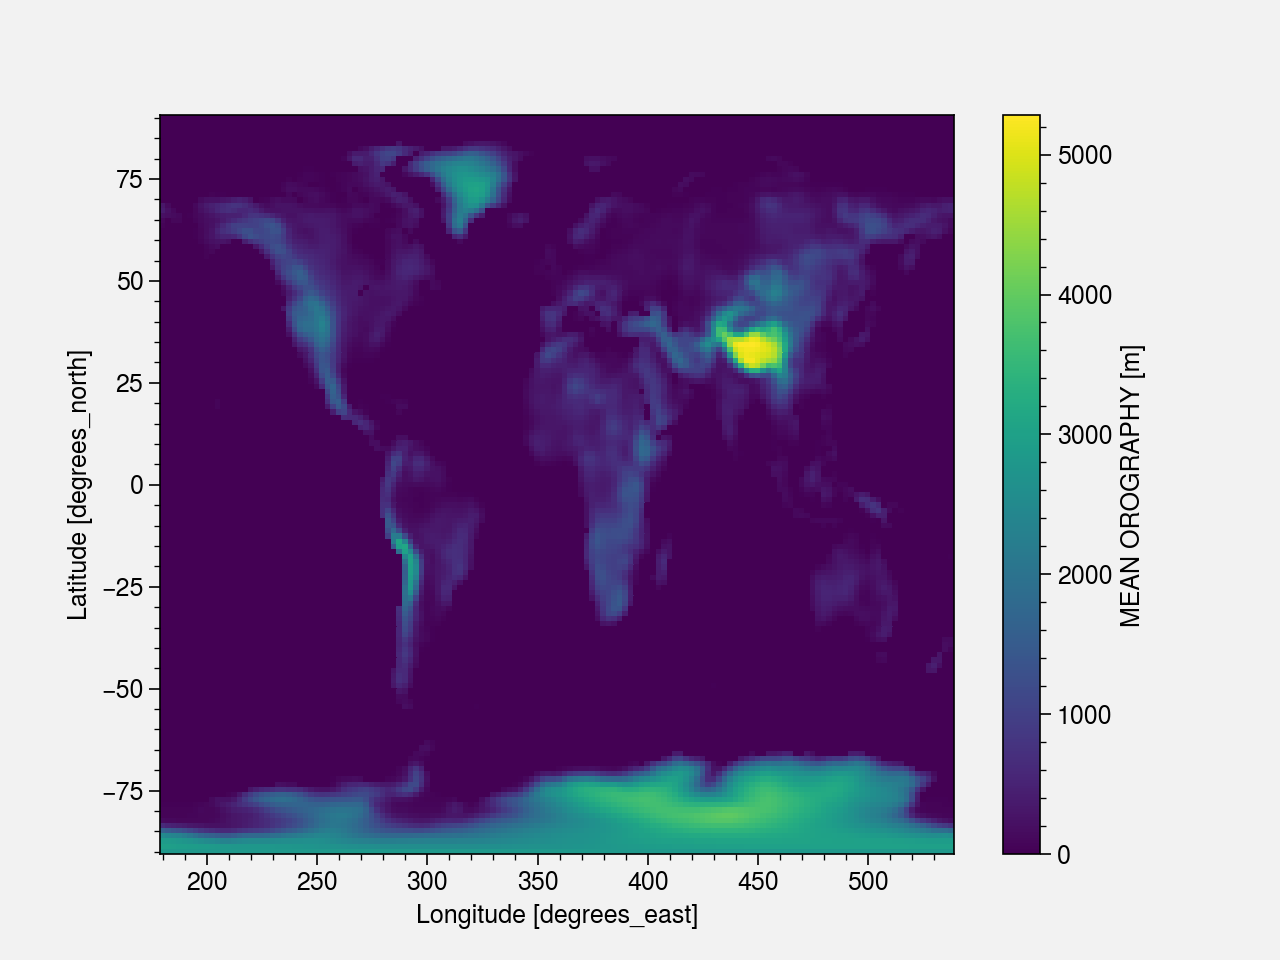

In [29]:
ZMEA_clim_360d.plot()

Décallage des longitude ?

Remettons les données sur la grille CMIP6 par exemple (décallage en longitude + latitude inversées)  
http://xarray.pydata.org/en/stable/reshaping.html

In [54]:
orog_fx_IPSL = xr.open_dataarray(
    '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc'
)
orog_fx_IPSL.name = 'orog_fx_IPSL-CM6A-LR'
orog_fx_IPSL

<xarray.DataArray 'orog_fx_IPSL-CM6A-LR' (lat: 143, lon: 144)>
array([[2841.648 , 2841.648 , 2841.648 , ..., 2841.648 , 2841.648 , 2841.648 ],
       [2688.9688, 2697.9724, 2708.5688, ..., 2658.9578, 2668.209 , 2677.9058],
       [2618.7102, 2638.589 , 2658.8015, ..., 2562.443 , 2580.6404, 2599.4429],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:         Surface Altitude
    units:             m
    online_operation:  once
    cell_methods:      area: mean
    cell_measures:     area: areacella
    standard_name:     surface_altitude
    description:       The surface called 'surface' means the lower boundary ...

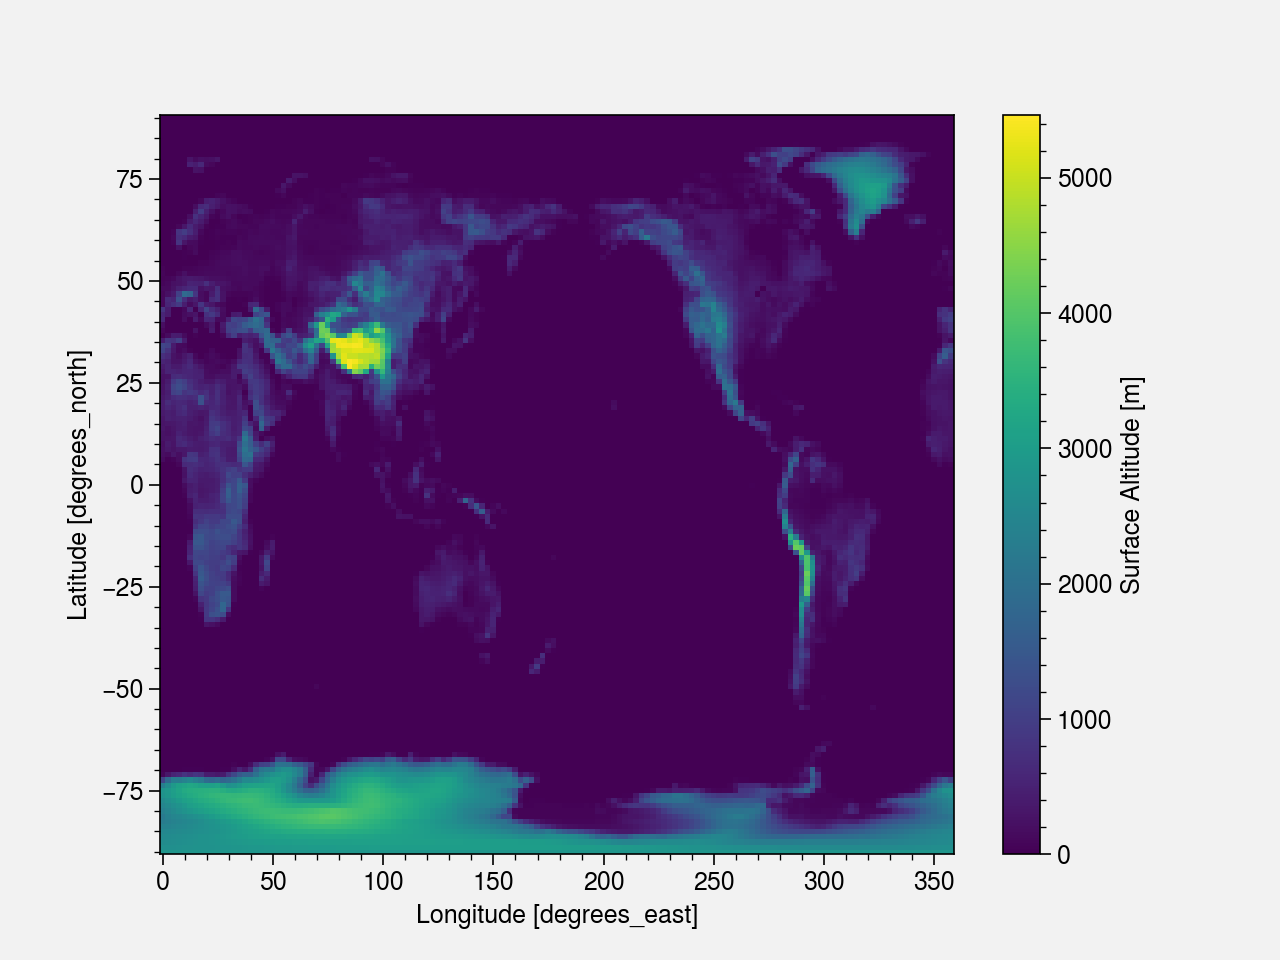

In [31]:
orog_fx_IPSL.plot()

In [55]:
ZMEA_correct = orog_fx_IPSL.copy()
ZMEA_correct.values = ZMEA_clim_360d.roll(
    lonv=int(ZMEA_clim_360d.lonv.size/2), roll_coords=True
).sortby('latu').values
ZMEA_correct.name = 'ZMEA_clim_360d'
ZMEA_correct

<xarray.DataArray 'ZMEA_clim_360d' (lat: 143, lon: 144)>
array([[2814.9966, 2814.9966, 2814.9966, ..., 2814.9966, 2814.9966,
        2814.9966],
       [2695.0745, 2705.592 , 2716.1943, ..., 2663.5703, 2673.3835,
        2683.9956],
       [2628.484 , 2646.412 , 2664.673 , ..., 2575.9863, 2593.2441,
        2610.727 ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:         Surface Altitude
    units:             m
    online_operation:  once
    cell_methods:      area: mean
    cell_measures:     area: areacella
    standard_name:     surface_altitude
    description:       The surface called 'surface' means the lower boundary ...

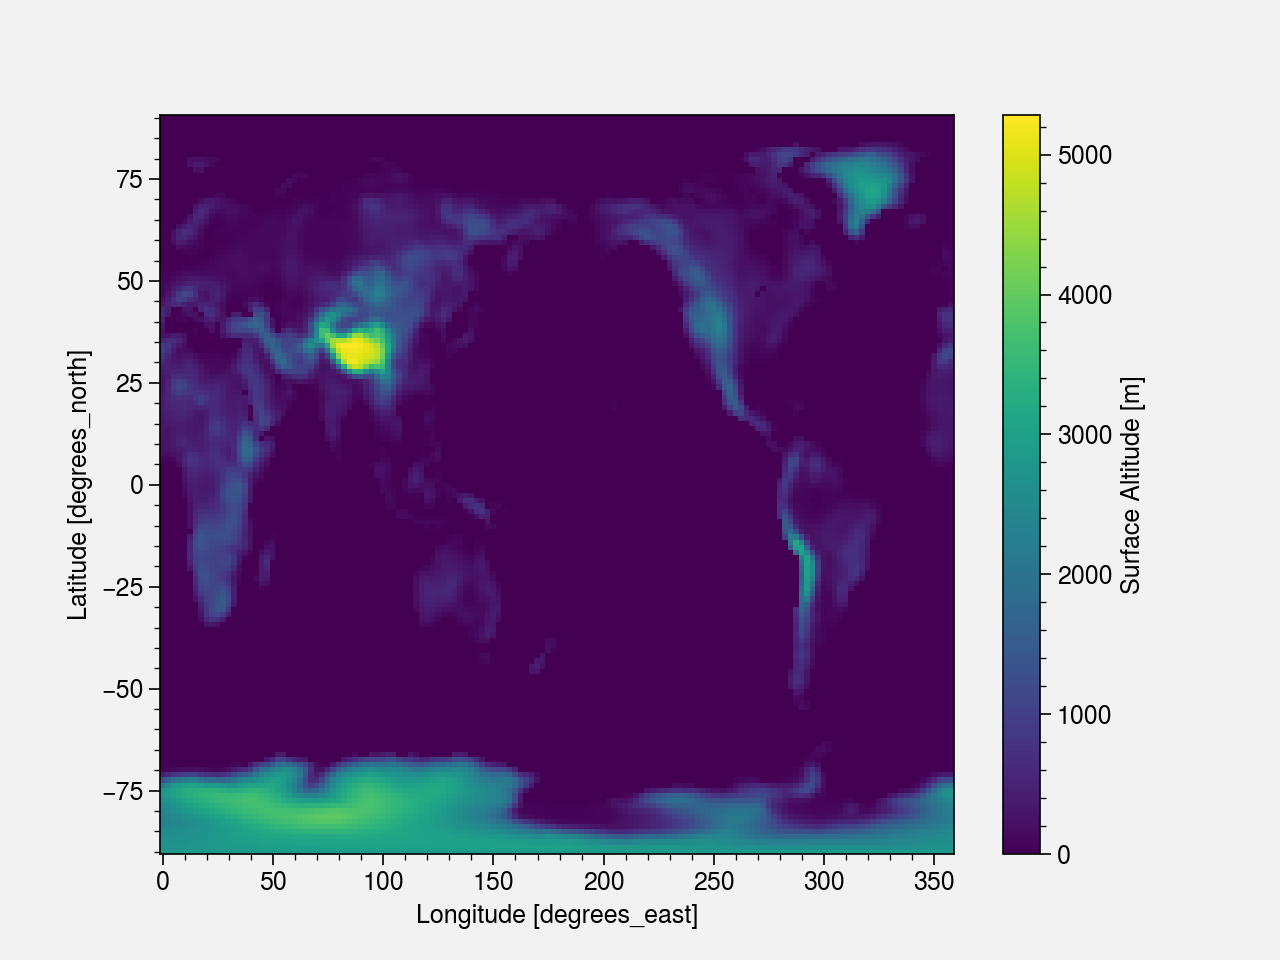

In [34]:
ZMEA_correct.plot()

In [59]:
with xr.set_options(keep_attrs=True):
    bias = ZMEA_correct - orog_fx_IPSL
bias.name = ZMEA_correct.name + ' - ' + orog_fx_IPSL.name
bias.attrs['long_name'] += ' Bias'
bias

<xarray.DataArray 'ZMEA_clim_360d - orog_fx_IPSL-CM6A-LR' (lat: 143, lon: 144)>
array([[-26.651367 , -26.651367 , -26.651367 , ..., -26.651367 ,
        -26.651367 , -26.651367 ],
       [  6.105713 ,   7.619629 ,   7.6254883, ...,   4.612549 ,
          5.1745605,   6.0898438],
       [  9.773682 ,   7.822998 ,   5.871582 , ...,  13.543213 ,
         12.60376  ,  11.28418  ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:         Surface Altitude Bias
    units:             m
    online_operation:  once
    cell_methods:      area: mean
    cell_measures:     area: areacella
    standard_name:     surface_altitude
    description:       The surface called 'surface' means the lower boundary ...

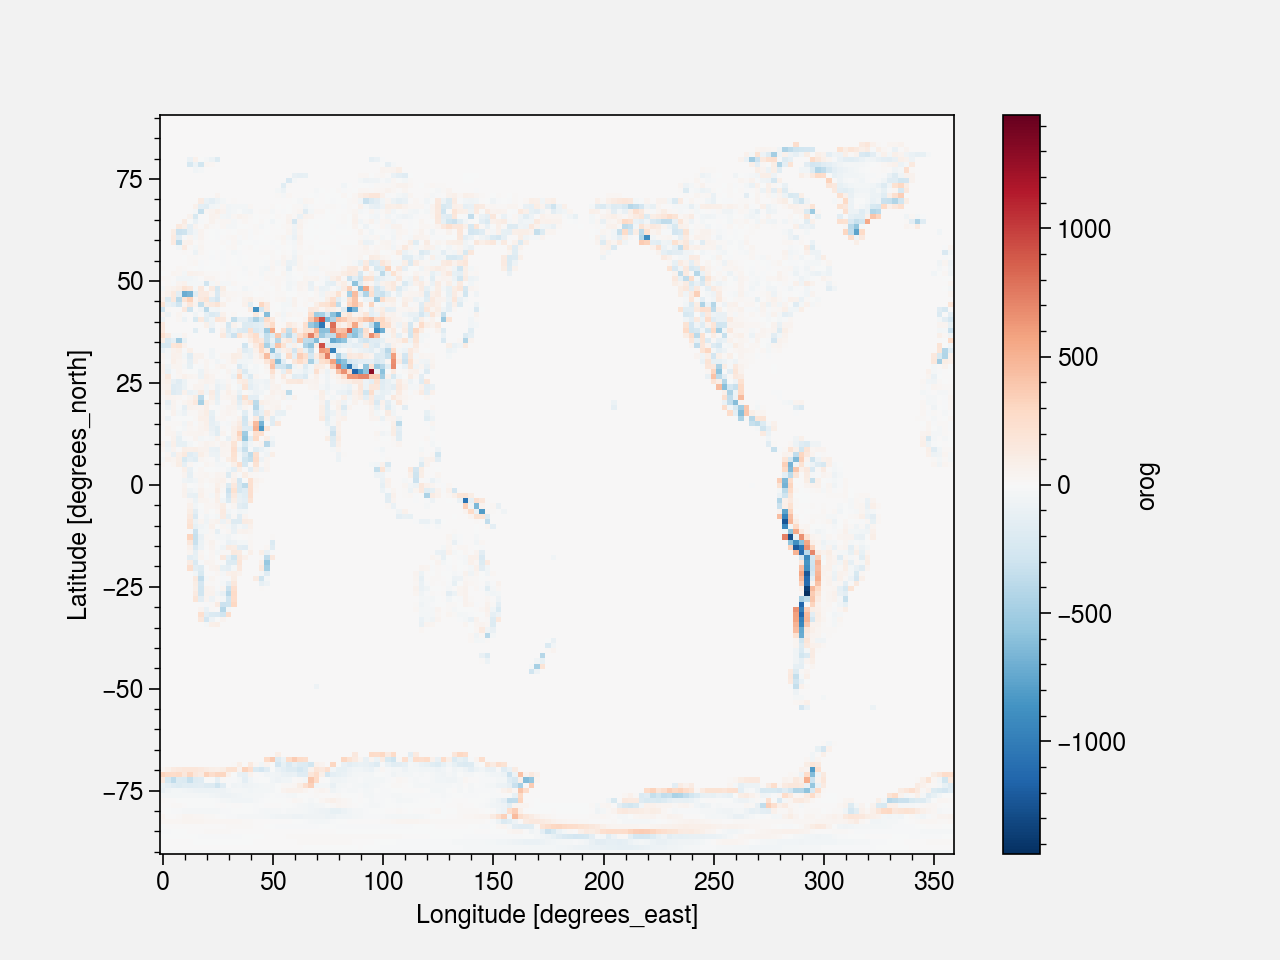

In [38]:
bias.plot()

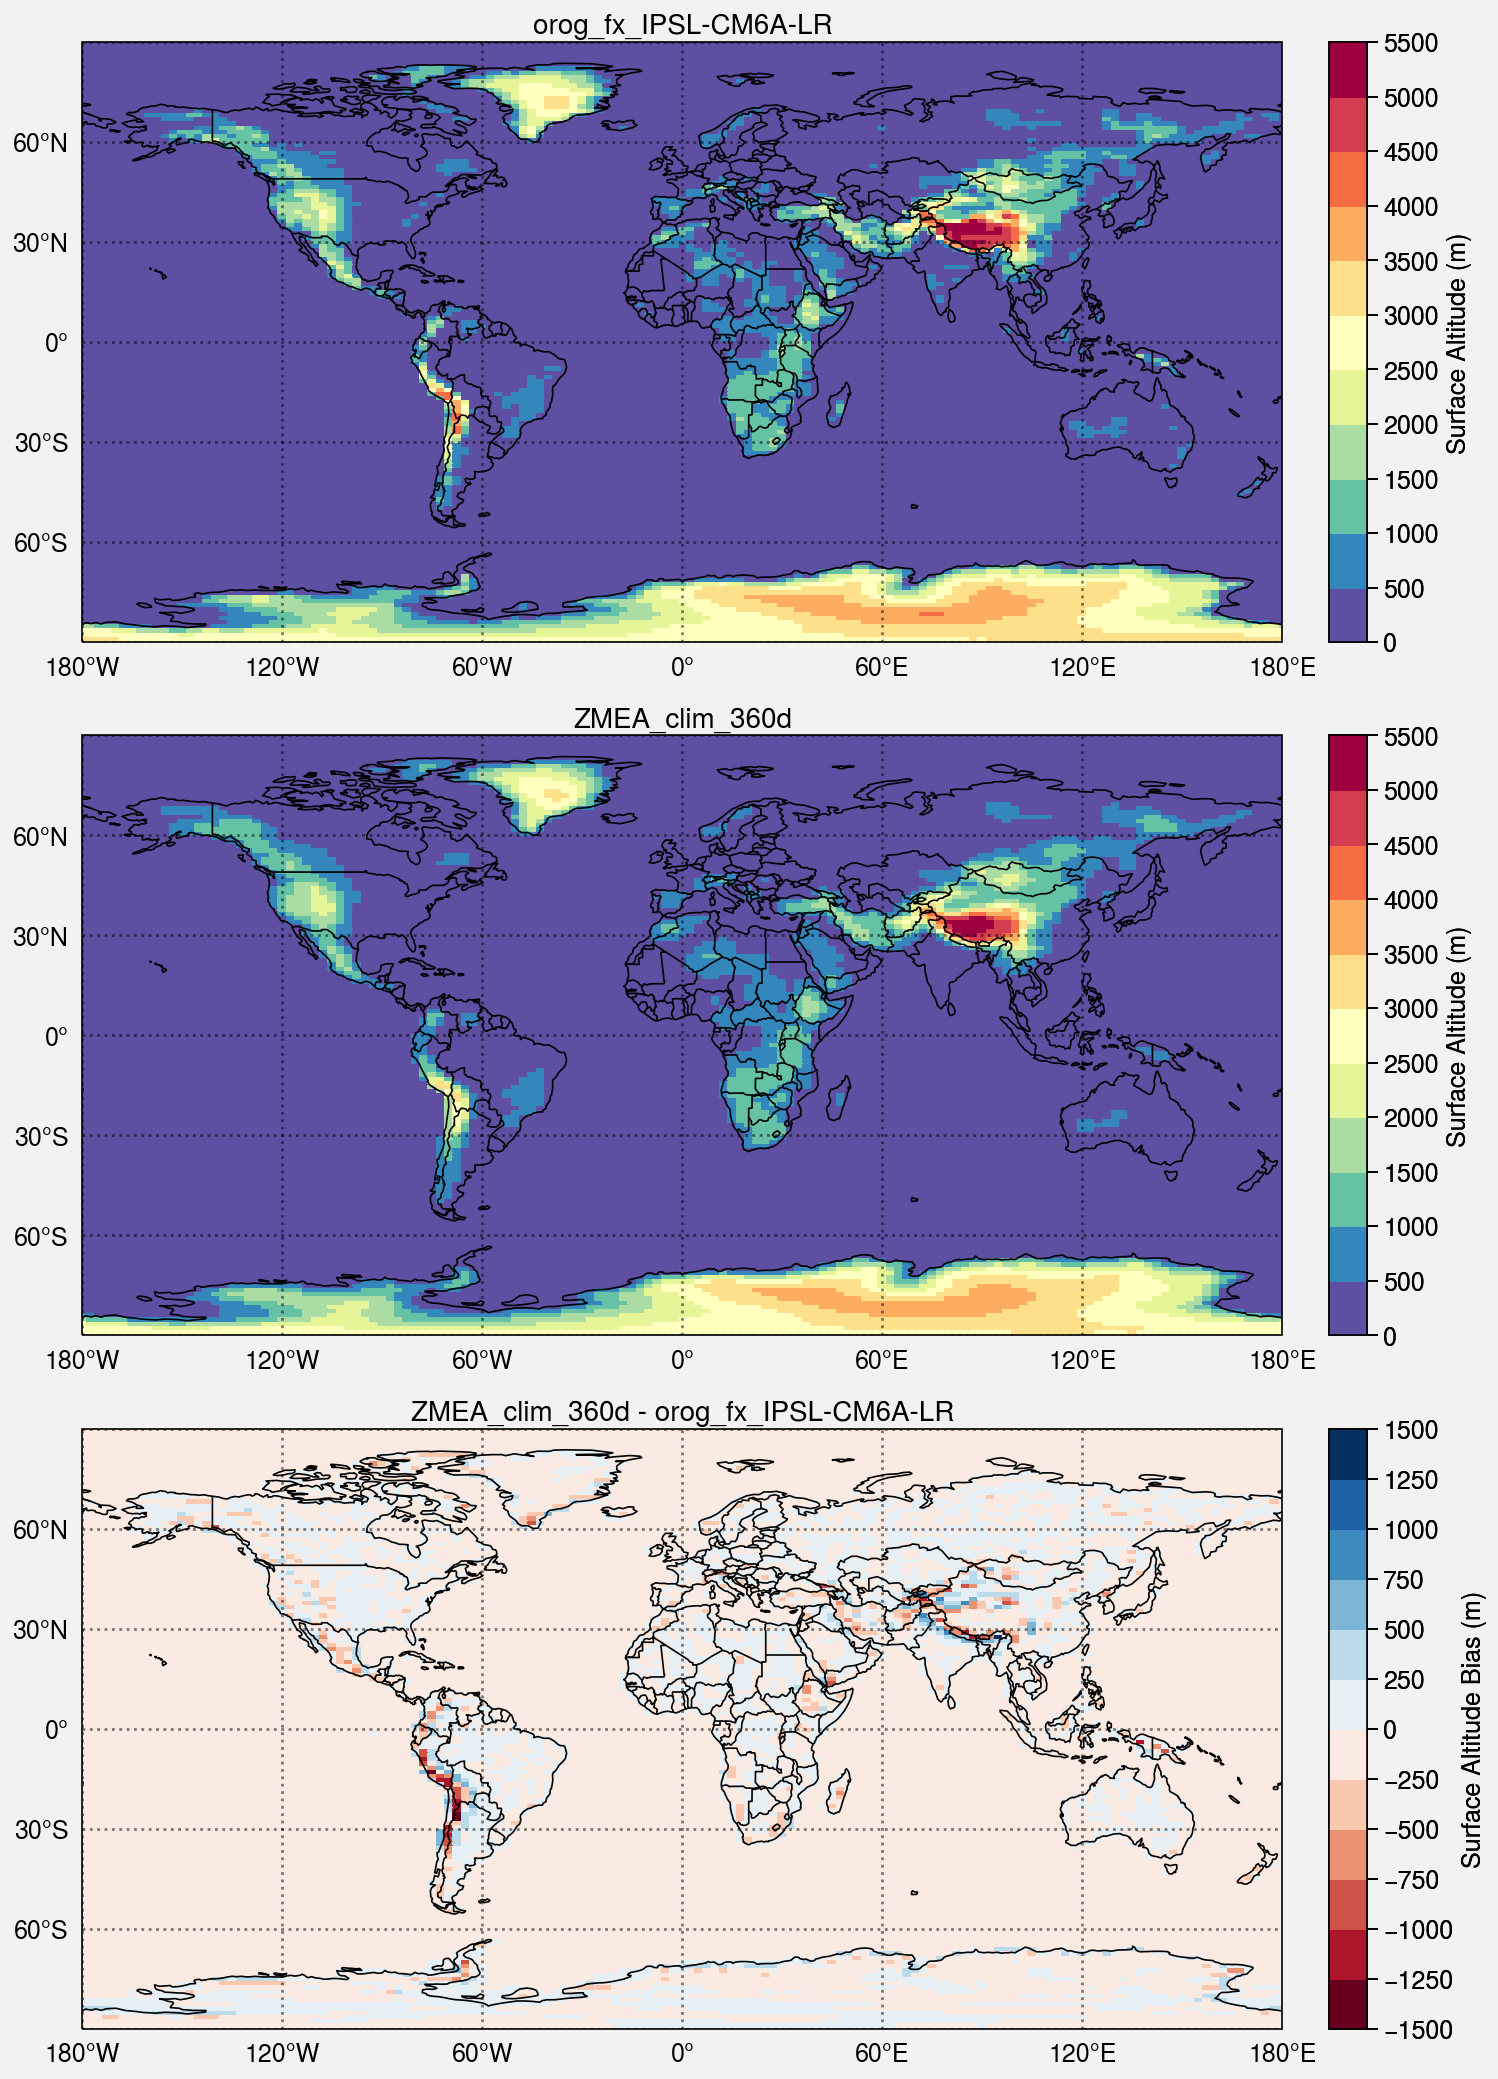

In [61]:
f, axs = plot.subplots(proj='cyl', ncols=1, nrows=3, axwidth=6)

axs[0].pcolormesh(orog_fx_IPSL, cmap='Spectral', colorbar='r')
axs[0].format(title=orog_fx_IPSL.name)

axs[1].pcolormesh(ZMEA_correct, cmap='Spectral', colorbar='r')
axs[1].format(title=ZMEA_correct.name)

axs[2].pcolormesh(bias, cmap='RdBu', colorbar='r')
axs[2].format(title=bias.name)

axs.format(labels=True, coast=True, borders=True, lonlines=60, latlines=30)

# Check "by hand"

In [62]:
orog_fx_IPSL.lon

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    axis:           X
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east

In [63]:
test = orog_fx_IPSL.copy()

In [64]:
144/2

72.0

In [65]:
test[:,0:72] = ZMEA_clim_360d[:,72:]

In [66]:
ZMEA_clim_360d[:,:72]

<xarray.DataArray 'ZMEA' (latu: 143, lonv: 72)>
array([[   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [2881.2407, 2858.5525, 2832.5352, ..., 2575.9863, 2593.2441,
        2610.727 ],
       [2965.1213, 2953.5305, 2939.9067, ..., 2663.5703, 2673.3835,
        2683.9956],
       [2814.9966, 2814.9966, 2814.9966, ..., 2814.9966, 2814.9966,
        2814.9966]], dtype=float32)
Coordinates:
  * lonv     (lonv) float32 180.0 182.5 185.0 187.5 ... 350.0 352.5 355.0 357.5
  * latu     (latu) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
Attributes:
    units:      m
    long_name:  MEAN OROGRAPHY

In [67]:
test[:,72:] = ZMEA_clim_360d[:,:72]

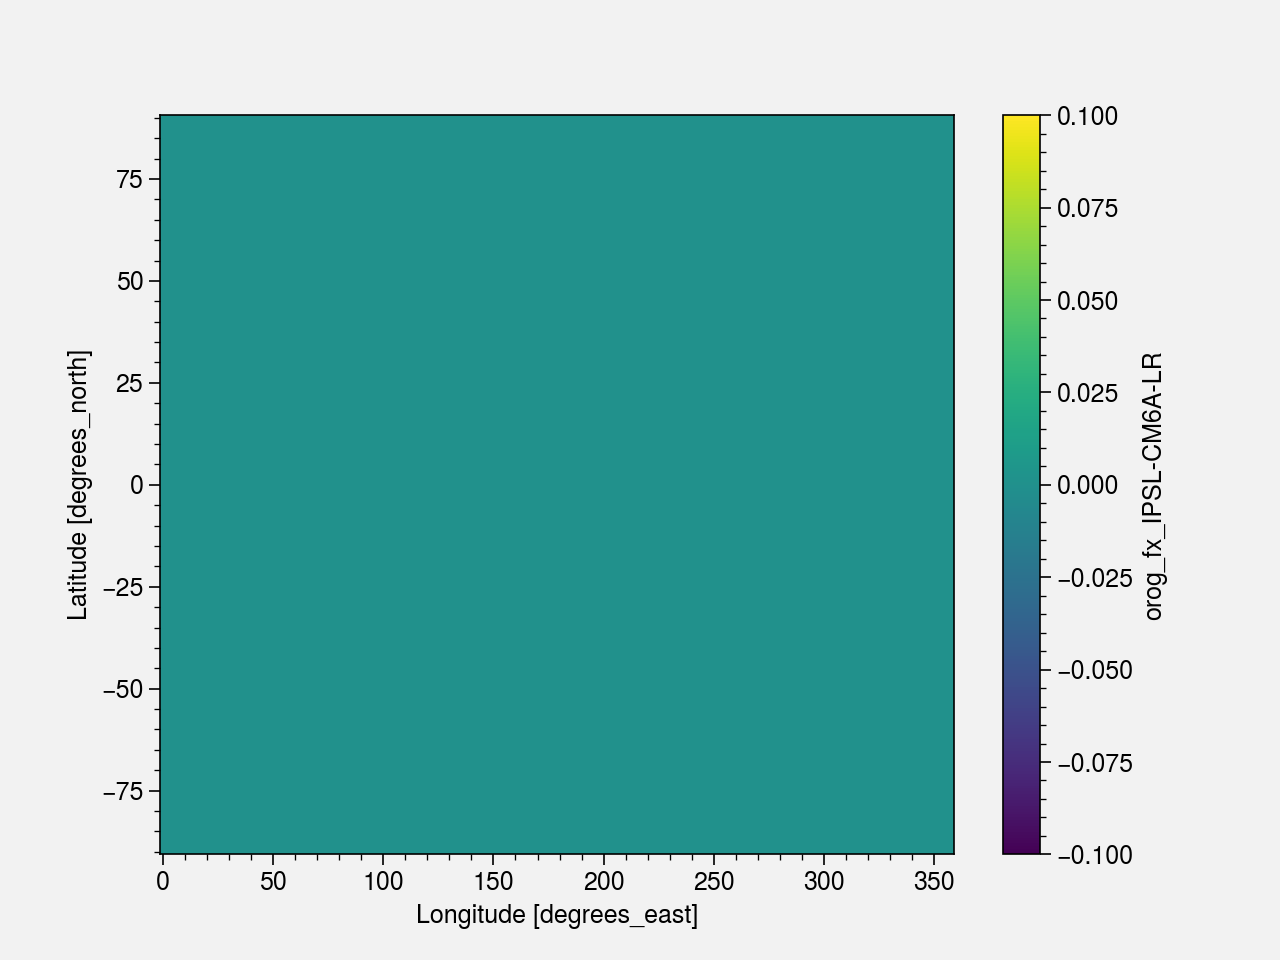

In [70]:
(test - ZMEA_clim_360d.roll(lonv=72, roll_coords=True).values).plot()

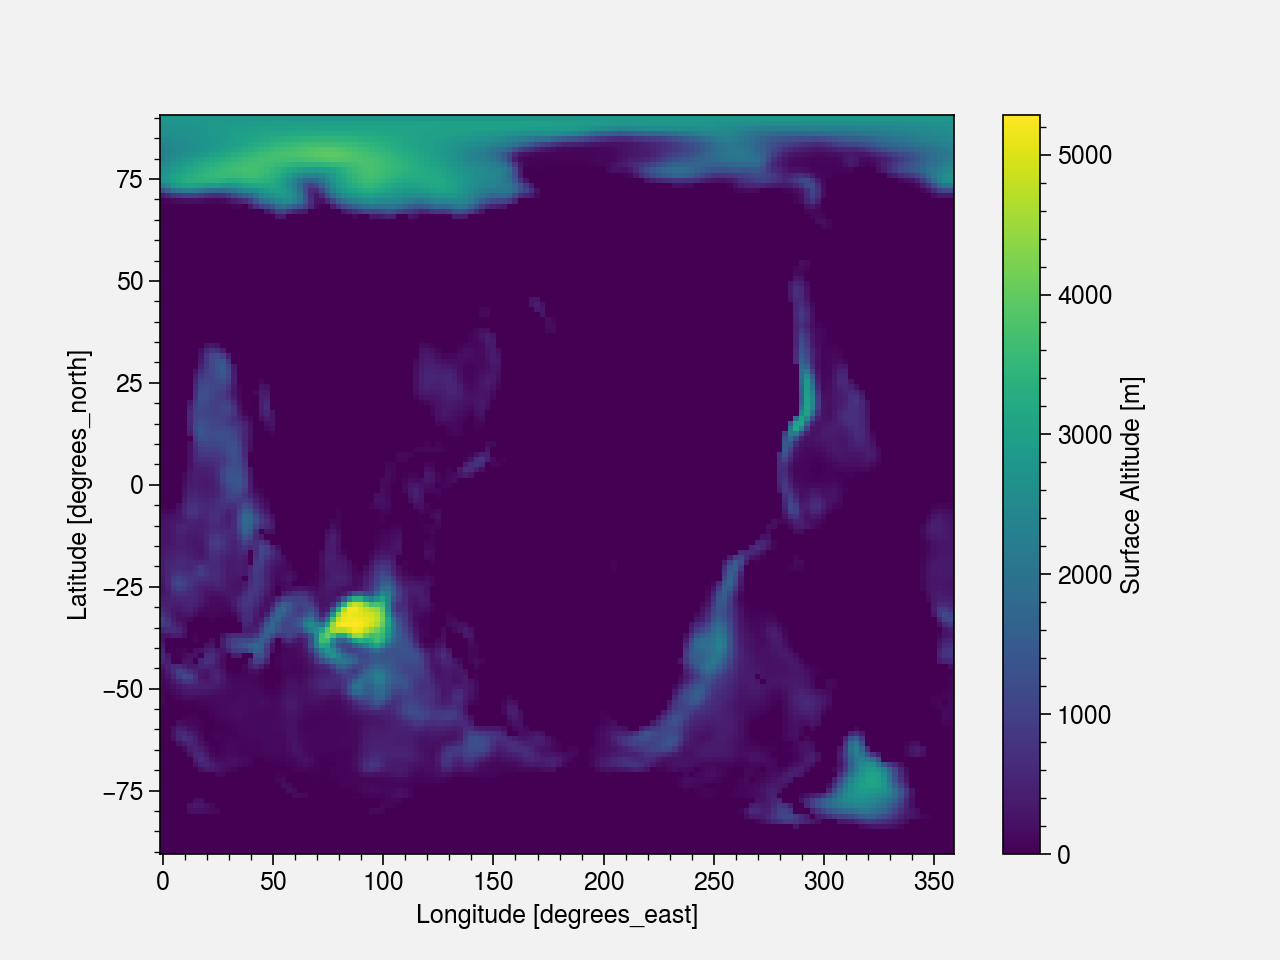

In [71]:
test.plot()

In [75]:
ZMEA_clim_360d.sortby('latu').values

array([[2814.9966, 2814.9966, 2814.9966, ..., 2814.9966, 2814.9966,
        2814.9966],
       [2965.1213, 2953.5305, 2939.9067, ..., 2979.02  , 2974.8362,
        2971.2524],
       [2881.2407, 2858.5525, 2832.5352, ..., 2904.9102, 2906.1929,
        2898.6482],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

# Make function

In [78]:
def physics2dynamics(grilles_gcm, startphy, orog_fx_IPSL):
    # Create the right dimension for topo (without the duplicated longitude)
    ZMEA = grilles_gcm.aire[:,:-1].copy()

    # Dupplicate the first and last value North and South Pole
    ZMEA[0] = startphy.ZMEA[0]
    ZMEA[-1] = startphy.ZMEA[-1]

    # Fill all the values except the poles
    k=0
    for lat in range(ZMEA[1:-1,:].latu.size):
        for lon in range(ZMEA[1:-1,:].lonv.size):
            ZMEA[1:-1,:][lat,lon] = startphy.ZMEA[k+1]
            k += 1

    ZMEA_correct = orog_fx_IPSL.copy()
    ZMEA_correct.values = ZMEA.roll(
        lonv=int(ZMEA.lonv.size/2), roll_coords=True
    ).sortby('latu').values
    ZMEA_correct.name = 'ZMEA'
    ZMEA_correct
    
    return ZMEA_correct

In [79]:
ZMEA_correct_function = physics2dynamics(grilles_gcm, startphy, orog_fx_IPSL)

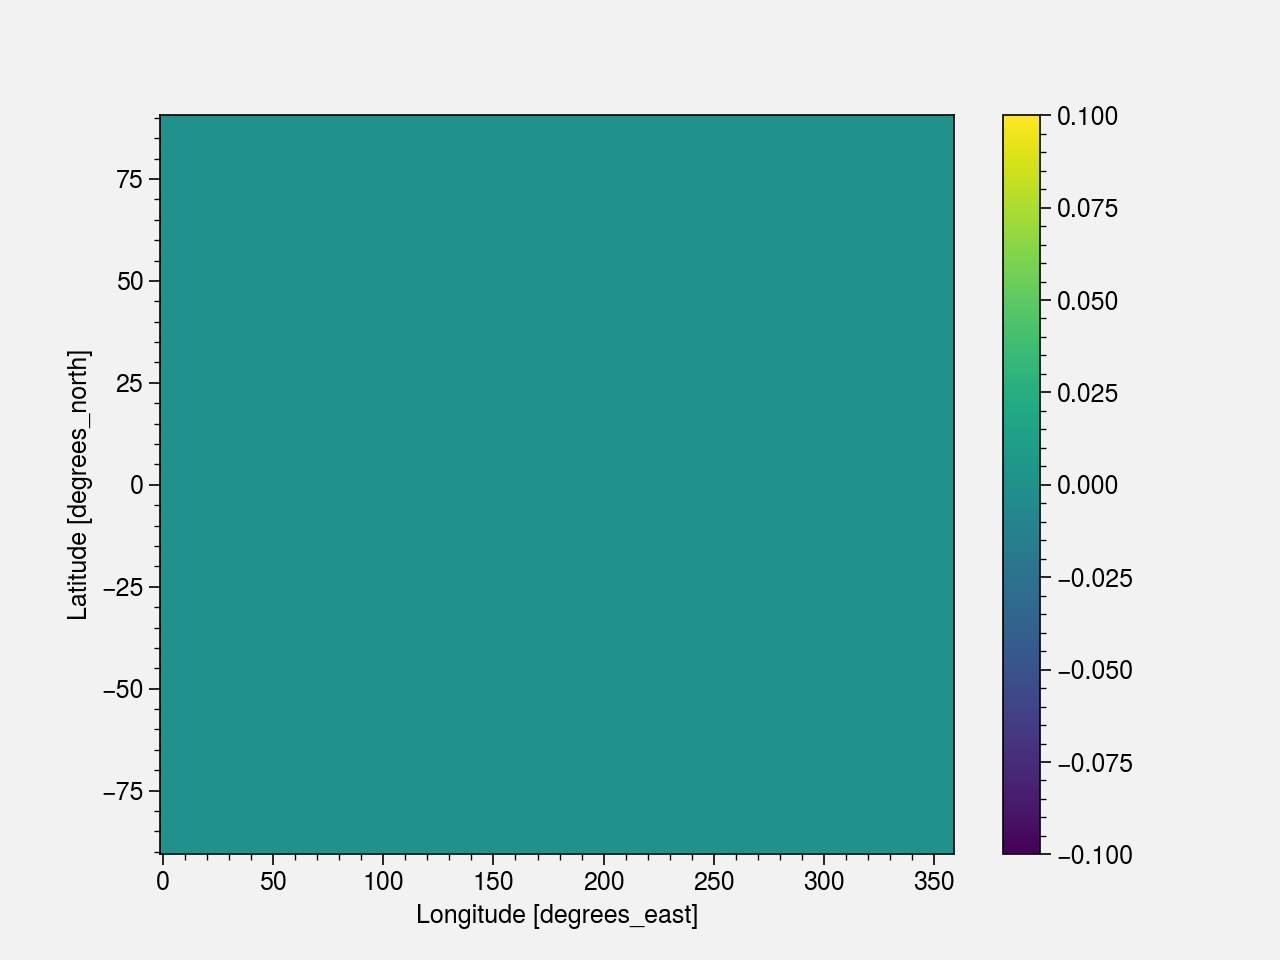

In [80]:
(ZMEA_correct-ZMEA_correct_function).plot()